In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
%config InlineBackend.figure_formats = ['svg']
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
#load data
movie_data_df = pd.read_csv('movies_data')

In [3]:
movie_data_df

,Unnamed: 0,link,theaters,release_date,Distributor,release_year,genres,runtime,rating,budget,dom_gross,int_gross
0,2016: Obama's America,/release/rl1665238529/?ref_=bo_yld_table_100,"2,017",Jul 13,Rocky Mountain Pictures,2012,Documentary,87.0,PG,NaN,33449086,33449086
1,21 Jump Street,/release/rl1564575233/?ref_=bo_yld_table_18,"3,148",Mar 16,Sony Pictures Entertainment (SPE),2012,Action Comedy Crime,109.0,R,42000000.0,138447667,63137661
2,A Dangerous Method,/release/rl692880897/?ref_=bo_yld_table_173,365,Nov 23,Sony Pictures Classics,2012,Biography Drama Romance Thriller,99.0,R,NaN,5704709,24814727
3,A Separation,/release/rl2168620545/?ref_=bo_yld_table_156,282,Dec 30,Sony Pictures Classics,2012,Drama,123.0,PG-13,NaN,7099055,15827021
4,A Thousand Words,/release/rl3846342145/?ref_=bo_yld_table_123,"1,895",Mar 9,DreamWorks,2012,Comedy Drama,91.0,PG-13,40000000.0,18450127,3594150
...,...,...,...,...,...,...,...,...,...,...,...,...
1533,What Men Want,/release/rl3221390849/?ref_=bo_yld_table_54,"2,912",Feb 8,Paramount Pictures,2019,Comedy Fantasy Romance,117.0,R,20000000.0,54611903,17604391
1534,"Where'd You Go, Bernadette",/release/rl2567276033/?ref_=bo_yld_table_138,"2,404",Aug 16,United Artists Releasing,2019,Comedy Drama,109.0,PG-13,NaN,9198356,1826997
1535,Wonder Park,/release/rl2575074817/?ref_=bo_yld_table_61,"3,838",Mar 15,Paramount Pictures,2019,Adventure Animation Comedy Drama Family Fantasy,85.0,PG,90000000.0,45216793,74342317
1536,Yesterday,/release/rl1392805377/?ref_=bo_yld_table_38,"2,755",Jun 28,Universal Pictures,2019,Comedy Fantasy Music Romance,116.0,PG-13,26000000.0,73286650,81321857


In [4]:
movie_data_df.isna().sum()

Unnamed: 0        0
link              0
theaters          0
release_date      0
Distributor       0
release_year      0
genres            0
runtime          45
rating           74
budget          602
dom_gross         0
int_gross         0
dtype: int64

In [5]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1538 non-null   object 
 1   link          1538 non-null   object 
 2   theaters      1538 non-null   object 
 3   release_date  1538 non-null   object 
 4   Distributor   1538 non-null   object 
 5   release_year  1538 non-null   int64  
 6   genres        1538 non-null   object 
 7   runtime       1493 non-null   float64
 8   rating        1464 non-null   object 
 9   budget        936 non-null    float64
 10  dom_gross     1538 non-null   int64  
 11  int_gross     1538 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 144.3+ KB


In [6]:
#dropping missing values
movie_data_df.dropna(subset=['runtime', 'rating', 'budget'], inplace=True)

In [7]:
movie_data_df.isna().sum()

Unnamed: 0      0
link            0
theaters        0
release_date    0
Distributor     0
release_year    0
genres          0
runtime         0
rating          0
budget          0
dom_gross       0
int_gross       0
dtype: int64

In [8]:
movie_data_df

,Unnamed: 0,link,theaters,release_date,Distributor,release_year,genres,runtime,rating,budget,dom_gross,int_gross
1,21 Jump Street,/release/rl1564575233/?ref_=bo_yld_table_18,"3,148",Mar 16,Sony Pictures Entertainment (SPE),2012,Action Comedy Crime,109.0,R,42000000.0,138447667,63137661
4,A Thousand Words,/release/rl3846342145/?ref_=bo_yld_table_123,"1,895",Mar 9,DreamWorks,2012,Comedy Drama,91.0,PG-13,40000000.0,18450127,3594150
5,Abraham Lincoln: Vampire Hunter,/release/rl591431169/?ref_=bo_yld_table_90,"3,109",Jun 22,Twentieth Century Fox,2012,Action Fantasy Horror,105.0,R,69000000.0,37519139,78952441
6,Act of Valor,/release/rl2118157825/?ref_=bo_yld_table_38,"3,053",Feb 24,Relativity Media,2012,Action Adventure Thriller War,110.0,R,12000000.0,70012847,12484188
8,Alex Cross,/release/rl3879765505/?ref_=bo_yld_table_111,"2,541",Oct 19,Lionsgate,2012,Action Crime Mystery Thriller,101.0,PG-13,35000000.0,25888412,8730455
...,...,...,...,...,...,...,...,...,...,...,...,...
1529,Us,/release/rl1711506945/?ref_=bo_yld_table_12,"3,743",Mar 22,Universal Pictures,2019,Horror Mystery Thriller,116.0,R,20000000.0,175084580,80100000
1533,What Men Want,/release/rl3221390849/?ref_=bo_yld_table_54,"2,912",Feb 8,Paramount Pictures,2019,Comedy Fantasy Romance,117.0,R,20000000.0,54611903,17604391
1535,Wonder Park,/release/rl2575074817/?ref_=bo_yld_table_61,"3,838",Mar 15,Paramount Pictures,2019,Adventure Animation Comedy Drama Family Fantasy,85.0,PG,90000000.0,45216793,74342317
1536,Yesterday,/release/rl1392805377/?ref_=bo_yld_table_38,"2,755",Jun 28,Universal Pictures,2019,Comedy Fantasy Music Romance,116.0,PG-13,26000000.0,73286650,81321857


In [9]:
movie_data_df.reset_index(drop=True, inplace=True)

In [10]:
movie_data_df.rename(columns={ movie_data_df.columns[0]: "title" }, inplace = True)

In [11]:
movie_data_df.theaters.replace(',', '', inplace=True, regex=True)

In [12]:
movie_data_df.rating.value_counts()

PG-13    404
R        343
PG       166
G          4
Name: rating, dtype: int64

In [13]:
movie_data_df.genres.value_counts()

Comedy                                                            36
Action Adventure Sci-Fi                                           32
Horror Mystery Thriller                                           29
Comedy Drama                                                      26
Comedy Drama Romance                                              21
                                                                  ..
Adventure Comedy Family Fantasy Horror                             1
Comedy Mystery Sci-Fi                                              1
Adventure Animation Comedy Drama Family Fantasy Horror Romance     1
Action Adventure Biography Drama History                           1
Comedy Fantasy Music Romance                                       1
Name: genres, Length: 325, dtype: int64

In [14]:
movie_data_df['theaters'] = movie_data_df['theaters'].astype(int)

In [15]:
movie_data_df['dom_gross'] = movie_data_df['dom_gross'].astype(float)

In [16]:
movie_data_df['int_gross'] = movie_data_df['int_gross'].astype(float)

In [17]:
movie_data_df

,title,link,theaters,release_date,Distributor,release_year,genres,runtime,rating,budget,dom_gross,int_gross
0,21 Jump Street,/release/rl1564575233/?ref_=bo_yld_table_18,3148,Mar 16,Sony Pictures Entertainment (SPE),2012,Action Comedy Crime,109.0,R,42000000.0,138447667.0,63137661.0
1,A Thousand Words,/release/rl3846342145/?ref_=bo_yld_table_123,1895,Mar 9,DreamWorks,2012,Comedy Drama,91.0,PG-13,40000000.0,18450127.0,3594150.0
2,Abraham Lincoln: Vampire Hunter,/release/rl591431169/?ref_=bo_yld_table_90,3109,Jun 22,Twentieth Century Fox,2012,Action Fantasy Horror,105.0,R,69000000.0,37519139.0,78952441.0
3,Act of Valor,/release/rl2118157825/?ref_=bo_yld_table_38,3053,Feb 24,Relativity Media,2012,Action Adventure Thriller War,110.0,R,12000000.0,70012847.0,12484188.0
4,Alex Cross,/release/rl3879765505/?ref_=bo_yld_table_111,2541,Oct 19,Lionsgate,2012,Action Crime Mystery Thriller,101.0,PG-13,35000000.0,25888412.0,8730455.0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,Us,/release/rl1711506945/?ref_=bo_yld_table_12,3743,Mar 22,Universal Pictures,2019,Horror Mystery Thriller,116.0,R,20000000.0,175084580.0,80100000.0
913,What Men Want,/release/rl3221390849/?ref_=bo_yld_table_54,2912,Feb 8,Paramount Pictures,2019,Comedy Fantasy Romance,117.0,R,20000000.0,54611903.0,17604391.0
914,Wonder Park,/release/rl2575074817/?ref_=bo_yld_table_61,3838,Mar 15,Paramount Pictures,2019,Adventure Animation Comedy Drama Family Fantasy,85.0,PG,90000000.0,45216793.0,74342317.0
915,Yesterday,/release/rl1392805377/?ref_=bo_yld_table_38,2755,Jun 28,Universal Pictures,2019,Comedy Fantasy Music Romance,116.0,PG-13,26000000.0,73286650.0,81321857.0


In [18]:
movie_data_df.dom_gross.std()

95584279.68982029

In [19]:
data_df = movie_data_df[['title', 'theaters', 'runtime', 'budget', 'dom_gross', 'rating', 'genres']]

In [20]:
data_df

,title,theaters,runtime,budget,dom_gross,rating,genres
0,21 Jump Street,3148,109.0,42000000.0,138447667.0,R,Action Comedy Crime
1,A Thousand Words,1895,91.0,40000000.0,18450127.0,PG-13,Comedy Drama
2,Abraham Lincoln: Vampire Hunter,3109,105.0,69000000.0,37519139.0,R,Action Fantasy Horror
3,Act of Valor,3053,110.0,12000000.0,70012847.0,R,Action Adventure Thriller War
4,Alex Cross,2541,101.0,35000000.0,25888412.0,PG-13,Action Crime Mystery Thriller
...,...,...,...,...,...,...,...
912,Us,3743,116.0,20000000.0,175084580.0,R,Horror Mystery Thriller
913,What Men Want,2912,117.0,20000000.0,54611903.0,R,Comedy Fantasy Romance
914,Wonder Park,3838,85.0,90000000.0,45216793.0,PG,Adventure Animation Comedy Drama Family Fantasy
915,Yesterday,2755,116.0,26000000.0,73286650.0,PG-13,Comedy Fantasy Music Romance


In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      917 non-null    object 
 1   theaters   917 non-null    int64  
 2   runtime    917 non-null    float64
 3   budget     917 non-null    float64
 4   dom_gross  917 non-null    float64
 5   rating     917 non-null    object 
 6   genres     917 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 50.3+ KB


In [22]:
X, y = data_df.drop('dom_gross',axis=1), data_df['dom_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

In [23]:
val_df = pd.merge(X, y, left_index=True, right_index=True)

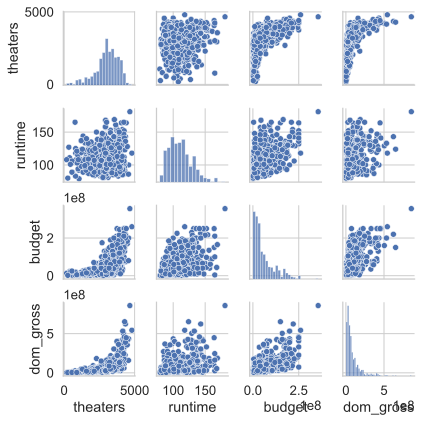

In [24]:
sns.pairplot(val_df, height=1.5)

In [25]:
pd.get_dummies(val_df['rating'], drop_first=True).head(5)

,PG,PG-13,R
524,0,0,1
225,1,0,0
280,0,1,0
94,1,0,0
586,0,1,0


In [26]:
#get dummies for rating column
val_df = pd.get_dummies(val_df, columns=['rating'], drop_first=True)

In [27]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 524 to 265
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         733 non-null    object 
 1   theaters      733 non-null    int64  
 2   runtime       733 non-null    float64
 3   budget        733 non-null    float64
 4   genres        733 non-null    object 
 5   dom_gross     733 non-null    float64
 6   rating_PG     733 non-null    uint8  
 7   rating_PG-13  733 non-null    uint8  
 8   rating_R      733 non-null    uint8  
dtypes: float64(3), int64(1), object(2), uint8(3)
memory usage: 58.4+ KB


In [28]:
genre = val_df.set_index('title').genres.str.split(' ', expand=True).stack()

In [29]:
genre

title                      
13 Hours                  0      Action
                          1       Drama
                          2    Thriller
                          3         War
Black Nativity            0       Drama
                                 ...   
Kubo and the Two Strings  3      Family
                          4     Fantasy
The Wolverine             0      Action
                          1      Sci-Fi
Dumb and Dumber to        0      Comedy
Length: 2488, dtype: object

In [30]:
#get dummies for genres column
genre = pd.get_dummies(genre, prefix='genre').groupby(level=0).sum()

In [31]:
genre

,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
title,,,,,,,,,,,,,,,,,,,,,
12 Years a Slave,0,0,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
13 Hours,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2 Guns,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21 Bridges,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21 Jump Street,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wrath of the Titans,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Yesterday,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
Young Adult,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
val_df.set_index('title', inplace=True)

In [33]:
val_df = val_df.merge(genre, left_index=True, right_index=True)

In [34]:
val_df.reset_index(inplace=True)

In [35]:
val_df.drop(['title','genres'], axis=1, inplace=True)

In [36]:
val_df

,theaters,runtime,budget,dom_gross,rating_PG,rating_PG-13,rating_R,genre_Action,genre_Adventure,genre_Animation,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
0,1474,134.0,20000000.0,56671993.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1474,134.0,20000000.0,56671993.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2917,144.0,50000000.0,52853219.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,3028,109.0,61000000.0,75612460.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2665,99.0,33000000.0,28539757.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,3545,99.0,150000000.0,83670083.0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
729,2755,116.0,26000000.0,73286650.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
730,987,94.0,12000000.0,16311571.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
731,2946,157.0,40000000.0,95720716.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:

def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [39]:
vif(val_df.drop('dom_gross',axis=1))

theaters             27.143410
runtime              72.823412
budget                7.224008
rating_PG            13.063847
rating_PG-13         32.016611
rating_R             26.187254
genre_Action          2.987079
genre_Adventure       3.379561
genre_Animation       3.297279
genre_Biography       1.565019
genre_Comedy          2.726380
genre_Crime           1.779119
genre_Documentary     1.120026
genre_Drama           3.218953
genre_Family          6.484013
genre_Fantasy         2.315938
genre_History         1.340173
genre_Horror          1.931241
genre_Music           1.172450
genre_Musical         1.354005
genre_Mystery         1.586335
genre_Romance         1.475613
genre_Sci-Fi          1.787000
genre_Sport           1.193867
genre_Thriller        2.571764
genre_War             1.297374
genre_Western         1.113973
dtype: float64

In [40]:
#val_df
X_train, y_train = val_df.drop('dom_gross',axis=1), val_df['dom_gross']

In [41]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state = 51)
cross_val_score(lm, X_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric

array([0.50306615, 0.54855404, 0.53364658, 0.53056607, 0.49837769])

In [42]:
X2_train = X_train.copy()

# sqrt number of theaters
X2_train['sqrt_theaters'] = np.sqrt(X2_train['theaters'])

In [43]:
cross_val_score(lm, X2_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric

array([0.54848043, 0.58122372, 0.56473491, 0.56117836, 0.51889948])

In [44]:
X3_train = X2_train.copy()

# log number of theaters
X3_train['log_theaters'] = np.log(X3_train['theaters'])

In [45]:
cross_val_score(lm, X3_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric

array([0.59254882, 0.60519361, 0.59799161, 0.56517855, 0.55164707])

In [46]:
X4_train = X3_train.copy()

# budget by runtime
X4_train['budget_runtime'] = X4_train['budget'] * X4_train['runtime']

In [47]:
cross_val_score(lm, X4_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric

array([0.60264322, 0.56441377, 0.66107519, 0.59239784, 0.57911436])

In [48]:
X5_train = X4_train.copy()

# power of 2 number of theaters
X5_train['theaters_power_of_2'] = X5_train['theaters']**2

In [49]:
cross_val_score(lm, X5_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric

array([0.64684427, 0.57071128, 0.70404398, 0.63779404, 0.60770169])

In [50]:
X6_train = X5_train.copy()

# budget by theaters
X6_train['budget_theaters'] = X6_train['budget'] * X6_train['theaters']

In [51]:
cross_val_score(lm, X6_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric

array([0.65998075, 0.58696461, 0.70132508, 0.65017495, 0.64270971])

In [52]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X6_train, y_train) #fit model to our choice of features
lm.score(X6_train, y_train)

0.6937576010108419

In [53]:
model = sm.OLS(y_train, sm.add_constant(X6_train)) 
fit = model.fit()
fit.summary()

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dom_gross   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     51.23
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.21e-157
Time:                        15:05:27   Log-Likelihood:                -14100.
No. Observations:                 733   AIC:                         2.826e+04
Df Residuals:                     701   BIC:                         2.841e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.113e+09   1.08e+09      2.882      0.004    9.93e+08    5.23e+09
theaters            -1.791e+06   4.63e+05     -3.866      0.000    -2.7e+06   -8.81e+05
runtime              4.692e+05   2.21e+05      2.127      0.034    3.61e+04    9.02e+05
budget                 -2.6526      0.392     -6.759      0.000      -3.423      -1.882
rating_PG           -1.014e+05   2.93e+07     -0.003      0.997   -5.76e+07    5.74e+07
rating_PG-13        -6.867e+06   3.04e+07     -0.226      0.821   -6.66e+07    5.28e+07
rating_R            -1.947e+05   3.06e+07     -0.006      0.995   -6.02e+07    5.98e+07
genre_Action         1.162e+06   5.67e+06      0.205      0.838   -9.96e+06    1.23e+07
genre_Adventure      8.962e+06   5.44e+06      1.649      0.100   -1.71e+06    1.96e+07
genre_Animation      2.271e+07   9.32e+06      2.438      0.015    4.42e+06     4.1e+07
genre_Biography      7.021e+06   6.56e+06      1.070      0.285   -5.86e+06    1.99e+07
genre_Comedy         1.031e+07   4.49e+06      2.294      0.022    1.49e+06    1.91e+07
genre_Crime          6.617e+06   6.05e+06      1.094      0.274   -5.26e+06    1.85e+07
genre_Documentary   -1.274e+07   2.67e+07     -0.476      0.634   -6.53e+07    3.98e+07
genre_Drama          2.256e+06   4.21e+06      0.536      0.592   -6.01e+06    1.05e+07
genre_Family        -2.877e+07   1.05e+07     -2.739      0.006   -4.94e+07   -8.14e+06
genre_Fantasy        -6.18e+06   5.82e+06     -1.062      0.288   -1.76e+07    5.24e+06
genre_History        3.988e+06    1.1e+07      0.363      0.717   -1.76e+07    2.56e+07
genre_Horror         8.956e+06   7.52e+06      1.191      0.234   -5.81e+06    2.37e+07
genre_Music          1.809e+07   7.88e+06      2.296      0.022    2.62e+06    3.36e+07
genre_Musical        3.586e+07   7.47e+06      4.800      0.000    2.12e+07    5.05e+07
genre_Mystery       -3.054e+06   6.83e+06     -0.447      0.655   -1.65e+07    1.04e+07
genre_Romance        1.129e+06   5.37e+06      0.210      0.834   -9.42e+06    1.17e+07
genre_Sci-Fi         1.283e+07   5.24e+06      2.447      0.015    2.54e+06    2.31e+07
genre_Sport         -8.547e+06   8.42e+06     -1.015      0.311   -2.51e+07    7.99e+06
genre_Thriller        4.75e+05   5.45e+06      0.087      0.931   -1.02e+07    1.12e+07
genre_War             2.32e+07   1.19e+07      1.949      0.052   -1.68e+05    4.66e+07
genre_Western        -2.64e+07   1.49e+07     -1.775      0.076   -5.56e+07    2.79e+06
sqrt_theaters        1.635e+08   4.63e+07      3.535      0.000    7.27e+07    2.54e+08
log_theaters        -9.604e+08   3.04e+08     -3.159      0.002   -1.56e+09   -3.63e+08
budget_runtime          0.0068      0.002      3.226      0.001       0.003       0.011
theaters_power_of_2   109.8220     23.974      4.581      0.000      62.753     156.891
bud

In [54]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

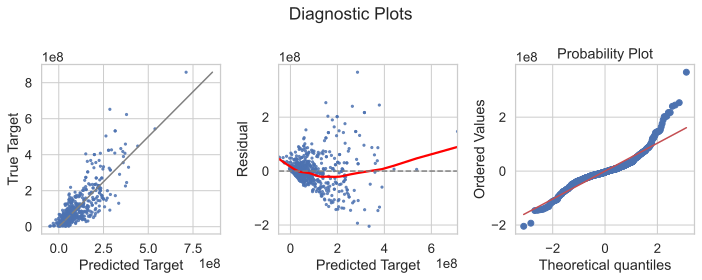

In [55]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)

In [56]:
X6_train.corr()

,theaters,runtime,budget,rating_PG,rating_PG-13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,sqrt_theaters,log_theaters,budget_runtime,theaters_power_of_2,budget_theaters
theaters,1.000000,0.111257,0.643622,0.242832,0.082753,-0.296022,0.280956,0.420141,0.290437,-0.231777,...,0.270284,-0.000467,-0.031282,-0.039895,0.028289,0.989271,0.944383,0.593324,0.977243,0.673749
runtime,0.111257,1.000000,0.367249,-0.259449,0.196538,0.015949,0.186356,0.028970,-0.287616,0.179800,...,0.136750,0.094876,0.044814,0.153069,0.214457,0.098310,0.084624,0.496972,0.133679,0.348311
budget,0.643622,0.367249,1.000000,0.150345,0.208335,-0.350017,0.444902,0.598674,0.192134,-0.148084,...,0.390034,-0.027445,-0.102694,-0.005985,0.031132,0.589969,0.513239,0.975203,0.707708,0.989589
rating_PG,0.242832,-0.259449,0.150345,1.000000,-0.432739,-0.351713,-0.200376,0.367539,0.632445,-0.032672,...,-0.025948,0.012878,-0.302694,-0.064308,-0.052734,0.218094,0.184974,0.064225,0.273636,0.165490
rating_PG-13,0.082753,0.196538,0.208335,-0.432739,1.000000,-0.680356,0.228416,0.051437,-0.293182,0.059245,...,0.176332,0.092617,0.060959,0.036463,-0.027386,0.087518,0.091831,0.241623,0.075503,0.195857
rating_R,-0.296022,0.015949,-0.350017,-0.351713,-0.680356,1.000000,-0.067887,-0.362063,-0.231013,-0.031791,...,-0.157048,-0.104789,0.188389,0.015967,0.072320,-0.279302,-0.254934,-0.309846,-0.315877,-0.351093
genre_Action,0.280956,0.186356,0.444902,-0.200376,0.228416,-0.067887,1.000000,0.275776,-0.149487,-0.087578,...,0.293789,0.060221,0.228846,0.147135,0.011853,0.270542,0.248995,0.444571,0.284591,0.419294
genre_Adventure,0.420141,0.028970,0.598674,0.367539,0.051437,-0.362063,0.275776,1.000000,0.458683,-0.162644,...,0.335783,-0.023973,-0.125293,-0.066880,-0.009996,0.379111,0.323475,0.535136,0.471029,0.589639
genre_Animation,0.290437,-0.287616,0.192134,0.632445,-0.293182,-0.231013,-0.149487,0.458683,1.000000,-0.097193,...,0.072836,-0.028141,-0.209760,-0.055772,-0.035727,0.261403,0.222254,0.090691,0.327437,0.210458
genre_Biography,-0.231777,0.179800,-0.148084,-0.032672,0.059245,-0.031791,-0.087578,-0.162644,-0.097193,1.000000,...,-0.143935,0.163855,-0.149625,0.220353,-0.009515,-0.225642,-0.203404,-0.120984,-0.221179,-0.154704


## testing the model

In [57]:
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)

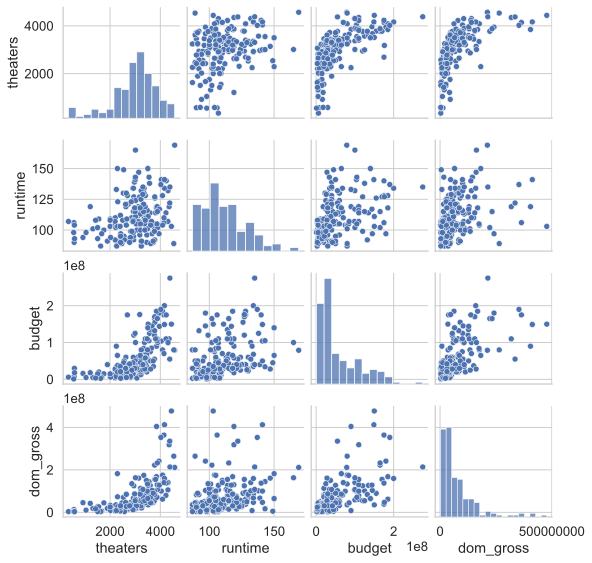

In [58]:
sns.pairplot(test_df, height=2)
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('pairplot', dpi=500)

In [59]:
pd.get_dummies(test_df['rating']).head(5)

,PG,PG-13,R
242,1,0,0
441,0,1,0
260,0,1,0
546,0,1,0
846,0,0,1


In [60]:
#get dummies for rating column
test_df = pd.get_dummies(test_df, columns=['rating'])

In [61]:
genre = test_df.set_index('title').genres.str.split(' ', expand=True).stack()

In [62]:
#get dummies for genres column
genre = pd.get_dummies(genre, prefix='genre').groupby(level=0).sum()

In [63]:
test_df.set_index('title', inplace=True)

In [64]:
test_df = test_df.merge(genre, left_index=True, right_index=True)

In [65]:
test_df.reset_index(inplace=True)

In [66]:
test_df.drop(['title','genres'], axis=1, inplace=True)

In [67]:
test_df

,theaters,runtime,budget,dom_gross,rating_PG,rating_PG-13,rating_R,genre_Action,genre_Adventure,genre_Animation,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
0,2771,93.0,13000000.0,25682380.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3405,128.0,40000000.0,95020213.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2471,89.0,5300000.0,44307191.0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,2690,128.0,175000000.0,38362475.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3615,104.0,28000000.0,72110659.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,3008,111.0,38000000.0,60323786.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,2890,107.0,11000000.0,33800859.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
181,2011,109.0,11000000.0,33307793.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,4165,141.0,149000000.0,412563408.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0


In [68]:
X_test, y_test = test_df.drop('dom_gross',axis=1), test_df['dom_gross']

In [69]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X_test, y_test) #fit model to our choice of features
lm.score(X_test, y_test)

0.5549083347918176

In [70]:
X2_test = X_test.copy()

# sqrt number of theaters
X2_test['sqrt_theaters'] = np.sqrt(X2_test['theaters'])

In [71]:
lm.fit(X2_test, y_test) #fit model to our choice of features
lm.score(X2_test, y_test)

0.6157259982308829

In [72]:
X3_test = X2_test.copy()

# log number of theaters
X3_test['log_theaters'] = np.log(X3_test['theaters'])

In [73]:
lm.fit(X3_test, y_test) #fit model to our choice of features
lm.score(X3_test, y_test)

0.6574933675164478

In [74]:
X4_test = X3_test.copy()

# budget by runtime
X4_test['budget_runtime'] = X4_test['budget'] * X4_test['runtime']

In [75]:
lm.fit(X4_test, y_test) #fit model to our choice of features
lm.score(X4_test, y_test)

0.6597355396185722

In [76]:
X5_test = X4_test.copy()

# power of 2 number of theaters
X5_test['theaters_power_of_2'] = X5_test['theaters']**2

In [77]:
lm.fit(X5_test, y_test) #fit model to our choice of features
lm.score(X5_test, y_test)

0.6761401049452036

In [78]:
X6_test = X5_test.copy()

# budget by theaters
X6_test['budget_theaters'] = X6_test['budget'] * X6_test['theaters']

In [79]:
lm.fit(X6_test, y_test) #fit model to our choice of features
lm.score(X6_test, y_test)

0.679166035007529

In [80]:
model = sm.OLS(y_test, sm.add_constant(X6_test)) 
fit = model.fit()
fit.summary()

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dom_gross   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     10.80
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           8.12e-25
Time:                        15:05:32   Log-Likelihood:                -3506.2
No. Observations:                 184   AIC:                             7074.
Df Residuals:                     153   BIC:                             7174.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.133e+09   2.63e+09      0.812      0.418   -3.05e+09    7.32e+09
theaters            -1.686e+06   1.13e+06     -1.490      0.138   -3.92e+06    5.49e+05
runtime              6.103e+05    5.3e+05      1.152      0.251   -4.37e+05    1.66e+06
budget                  0.6030      0.857      0.704      0.483      -1.090       2.296
rating_PG             7.24e+08   8.89e+08      0.814      0.417   -1.03e+09    2.48e+09
rating_PG-13         7.247e+08   8.86e+08      0.818      0.415   -1.03e+09    2.47e+09
rating_R             7.139e+08   8.87e+08      0.805      0.422   -1.04e+09    2.47e+09
genre_Action        -8.873e+06   1.05e+07     -0.846      0.399   -2.96e+07    1.18e+07
genre_Adventure      2.021e+06   1.29e+07      0.157      0.876   -2.34e+07    2.75e+07
genre_Animation      4.919e+06   2.19e+07      0.225      0.822   -3.83e+07    4.81e+07
genre_Biography      2.782e+06   1.99e+07      0.140      0.889   -3.66e+07    4.21e+07
genre_Comedy        -5.856e+06   1.02e+07     -0.572      0.568   -2.61e+07    1.44e+07
genre_Crime          7.405e+06   1.13e+07      0.656      0.513   -1.49e+07    2.97e+07
genre_Documentary    9.242e+06   2.35e+07      0.393      0.695   -3.72e+07    5.57e+07
genre_Drama          -3.93e+06   9.24e+06     -0.425      0.671   -2.22e+07    1.43e+07
genre_Family        -4.143e+07   2.45e+07     -1.689      0.093   -8.99e+07    7.02e+06
genre_Fantasy       -1.498e+05   1.17e+07     -0.013      0.990   -2.33e+07     2.3e+07
genre_History         5.93e+04   2.27e+07      0.003      0.998   -4.48e+07    4.49e+07
genre_Horror        -9.062e+06   1.56e+07     -0.580      0.563   -3.99e+07    2.18e+07
genre_Music          2.179e+07   1.87e+07      1.165      0.246   -1.52e+07    5.87e+07
genre_Musical        9.915e+07   2.67e+07      3.720      0.000    4.65e+07    1.52e+08
genre_Mystery        8.445e+06   1.61e+07      0.525      0.600   -2.33e+07    4.02e+07
genre_Romance       -2.221e+05   1.31e+07     -0.017      0.987   -2.62e+07    2.57e+07
genre_Sci-Fi         -2.11e+07   1.25e+07     -1.692      0.093   -4.57e+07    3.53e+06
genre_Sport         -1.155e+07   2.86e+07     -0.403      0.687   -6.81e+07     4.5e+07
genre_Thriller      -1.418e+07   1.16e+07     -1.221      0.224   -3.71e+07    8.77e+06
genre_War            5.369e+07   2.26e+07      2.378      0.019    9.08e+06    9.83e+07
genre_Western        6.895e+07    3.8e+07      1.814      0.072   -6.16e+06    1.44e+08
sqrt_theaters        1.509e+08   1.25e+08      1.207      0.229   -9.61e+07    3.98e+08
log_theaters        -8.801e+08   9.24e+08     -0.952      0.343   -2.71e+09    9.46e+08
budget_runtime         -0.0100      0.006     -1.608      0.110      -0.022       0.002
theaters_power_of_2   108.1102     49.478      2.185      0.030      10.363     205.858
bud

## Graphs below are for presentation

In [81]:
preds = lm.predict(X6_test)

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


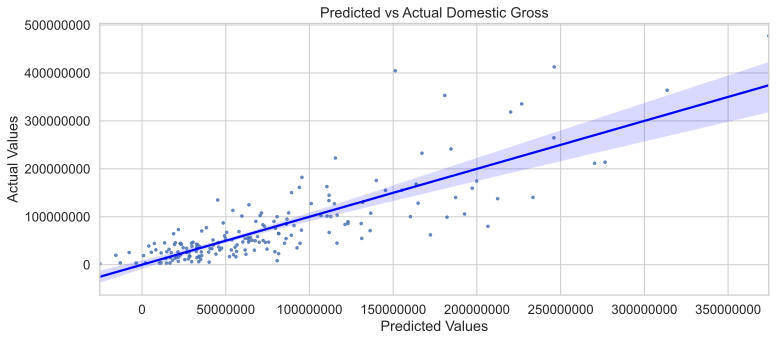

In [133]:
plt.figure(figsize=[12,5])
t = sns.regplot(preds, y_test, line_kws={'color': 'blue'}, scatter_kws={'s': 7})
t.set_title('Predicted vs Actual Domestic Gross')
t.set_xlabel('Predicted Values')
t.set_ylabel('Actual Values')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('actual_vs_predicted.png', dpi=500)

In [134]:
results = list(zip(X6_test.columns, preds))

In [135]:
results

[('theaters', 26620442.74884224),
 ('runtime', 86554603.85531902),
 ('budget', 7380726.614395618),
 ('rating_PG', 34195591.77930069),
 ('rating_PG-13', 95201349.78283882),
 ('rating_R', 18875835.584443092),
 ('genre_Action', 28217715.08843708),
 ('genre_Adventure', 64736326.10416412),
 ('genre_Animation', 16679087.615395546),
 ('genre_Biography', 57920497.77590847),
 ('genre_Comedy', 130896026.2155819),
 ('genre_Crime', -13017370.615605831),
 ('genre_Documentary', 49772046.975354195),
 ('genre_Drama', 53720097.55128384),
 ('genre_Family', 71342040.29388714),
 ('genre_Fantasy', 54252520.24625206),
 ('genre_History', 115507218.17514324),
 ('genre_Horror', 23549023.37090206),
 ('genre_Music', 21745170.505369663),
 ('genre_Musical', 114862241.63523483),
 ('genre_Mystery', 101058122.5829916),
 ('genre_Romance', 182157025.23148537),
 ('genre_Sci-Fi', 16165604.088707924),
 ('genre_Sport', 47568143.12782097),
 ('genre_Thriller', 220153904.0061636),
 ('genre_War', 26664803.265688896),
 ('genre_

In [228]:
results_df = pd.DataFrame(results)

In [229]:
genres_df = results_df[results_df[0].str.startswith('genre')]

In [230]:
genres_df[0] = genres_df[0].str[6:]

/var/folders/sm/vr3_mbxx38lfpdc4gtrgylkh0000gn/T/ipykernel_34787/3648270093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df[0] = genres_df[0].str[6:]


In [231]:
genres_df.rename(columns = {0: 'genres', 1 : 'number'}, inplace=True)

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [232]:
genres_df

,genres,number
6,Action,2.821772e+07
7,Adventure,6.473633e+07
8,Animation,1.667909e+07
9,Biography,5.792050e+07
10,Comedy,1.308960e+08
11,Crime,-1.301737e+07
12,Documentary,4.977205e+07
13,Drama,5.372010e+07
14,Family,7.134204e+07
15,Fantasy,5.425252e+07


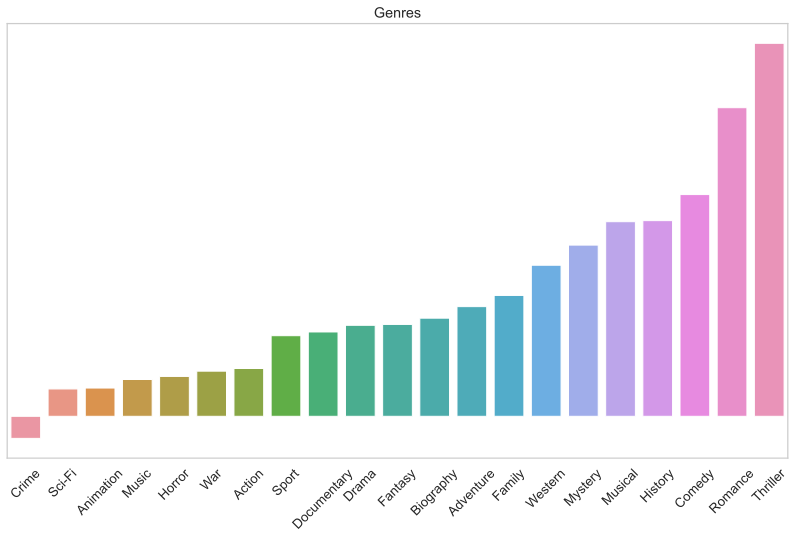

In [245]:
plt.figure(figsize=[14,8])
plt.title('Genres')
bar = sns.barplot(x = genres_df['genres'], y = genres_df['number'], order = genres_df.sort_values('number').genres)
plt.xticks(rotation=45);
bar.set(xlabel=None, ylabel=None)
bar.set(yticklabels=[])
bar.grid(False)
plt.savefig('genres_barplot.png', dpi=500)

In [234]:
rating_df = results_df[results_df[0].str.startswith('rating')]

In [235]:
rating_df[0] = rating_df[0].str[7:]

/var/folders/sm/vr3_mbxx38lfpdc4gtrgylkh0000gn/T/ipykernel_34787/2436579874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df[0] = rating_df[0].str[7:]


In [237]:
rating_df.rename(columns = {0: 'rating', 1 : 'number'}, inplace=True)

/Users/sambutsydypov/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [238]:
rating_df

,rating,number
3,PG,3.419559e+07
4,PG-13,9.520135e+07
5,R,1.887584e+07


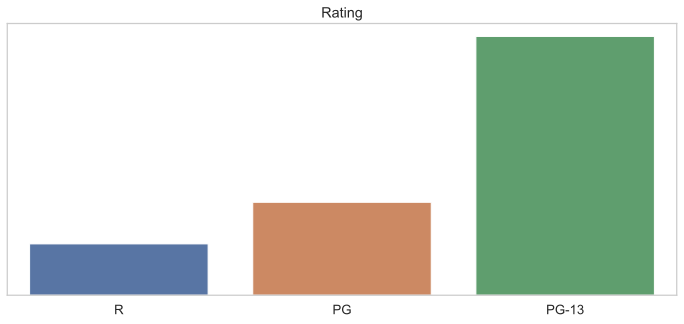

In [246]:
plt.figure(figsize=[12,5])
plt.title('Rating')
bar = sns.barplot(x = rating_df['rating'], y = rating_df['number'], order = rating_df.sort_values('number').rating)
bar.set(xlabel=None, ylabel=None)
bar.set(yticklabels=[])
bar.grid(False)
plt.savefig('rating_barplot.png', dpi=500)

## Analysis continues here

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, preds, squared=False)
mae = mean_absolute_error(y_test, preds)

In [84]:
print(rmse)
print(mae)

45636596.91180418
30787877.951298784


In [85]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

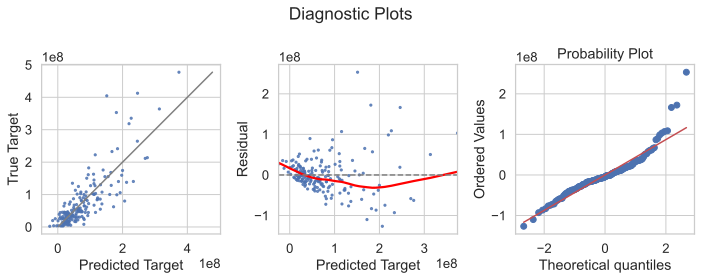

In [86]:
diagnostic_plots(fit.fittedvalues, y_test, fit.resid)
plt.savefig('diag_plot', dpi=500)

## The results suggest that there is a high posibillity of collinearity and overfitting. Let's try Lasso Regularization to minimize that

In [87]:
## Scale the data as before
std = StandardScaler()
std.fit(X6_train.values)

StandardScaler()

In [88]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X6_train.values)
X_te = std.transform(X6_test.values)

In [89]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5, tol=0.17)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, tol=0.17)

In [90]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.01

In [91]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X6_train.columns, lasso_model.coef_))

[('theaters', -76428353.30638732),
 ('runtime', 6439937.906463341),
 ('budget', -75700912.72025022),
 ('rating_PG', -5546503.111879987),
 ('rating_PG-13', -8333516.306044489),
 ('rating_R', -4897519.492991903),
 ('genre_Action', -1197762.8702664992),
 ('genre_Adventure', 3971867.833373038),
 ('genre_Animation', 10924594.353033546),
 ('genre_Biography', 4819137.061984012),
 ('genre_Comedy', 5352191.840107251),
 ('genre_Crime', 1907749.5920629974),
 ('genre_Documentary', -289255.0490614803),
 ('genre_Drama', 1082700.820819123),
 ('genre_Family', -9235128.30685121),
 ('genre_Fantasy', -6283973.1875660885),
 ('genre_History', 57270.34796860929),
 ('genre_Horror', 4142565.4367405586),
 ('genre_Music', 5181382.52992474),
 ('genre_Musical', 11039076.448956542),
 ('genre_Mystery', -537671.154784936),
 ('genre_Romance', 236902.36249016735),
 ('genre_Sci-Fi', 6923283.688034686),
 ('genre_Sport', -2954639.1517199418),
 ('genre_Thriller', -1105669.8270133391),
 ('genre_War', 2483454.9888354624),
 

In [92]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [93]:
r2_score(y_test, test_set_pred)

0.5298218155044118

In [94]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,test_set_pred)

55246442.80728908

In [95]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_test,test_set_pred)

38192245.4559813

## Lasso did not do a good job, let's try Ridge instead

In [96]:
alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [97]:
ridge_model.alpha_

0.01

In [98]:
list(zip(X6_train.columns, ridge_model.coef_))

[('theaters', -757817125.6511071),
 ('runtime', 9233680.81289713),
 ('budget', -168900882.76010987),
 ('rating_PG', -590580.1602721037),
 ('rating_PG-13', -4099684.2601053948),
 ('rating_R', -918172.3561221388),
 ('genre_Action', 546272.8312495254),
 ('genre_Adventure', 5096090.024706594),
 ('genre_Animation', 9427233.334591307),
 ('genre_Biography', 2963799.2170028165),
 ('genre_Comedy', 6035705.5949394675),
 ('genre_Crime', 3016186.5691255117),
 ('genre_Documentary', -1271812.451255107),
 ('genre_Drama', 1544265.6178566867),
 ('genre_Family', -13336217.223599656),
 ('genre_Fantasy', -3020608.9380675945),
 ('genre_History', 993532.5485693327),
 ('genre_Horror', 3471913.4298314294),
 ('genre_Music', 5332049.9783708),
 ('genre_Musical', 11252554.647101102),
 ('genre_Mystery', -1348392.9371251357),
 ('genre_Romance', 451589.5207080081),
 ('genre_Sci-Fi', 6379378.929964468),
 ('genre_Sport', -2300304.1740227416),
 ('genre_Thriller', 231116.27357148126),
 ('genre_War', 4418451.531189159),


In [99]:
test_set_pred = ridge_model.predict(X_te)

In [100]:
r2_score(y_test, test_set_pred)

0.5332018104674825

In [101]:
RMSE(y_test,test_set_pred)

55047508.116030656

In [102]:
MAE(y_test,test_set_pred)

36509073.05265155

## Ridge did not do a good job either. Let's stick with the first linear model